# Analyse des contenus Netflix
---
**Auteurs:** Ludovic Potvin & Louis Seranne

**Cours:** 8PRO408


# Mise en place
---
Importation de tout les prerequis pour l'analyse.

In [53]:
# LIEN DU DATASET : https://www.kaggle.com/datasets/shivamb/netflix-shows

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots

df = pd.read_csv("netflix_titles.csv")

# 1. Exploration du dataset
---
## Information generale

In [46]:
# Affichage d'information general
print("Info\n-------")
print(df.info())
print("\nDescribe\n-------")
print(df.describe())
print("\nNombres de null\n-----")
print(df.isnull().sum())
print("\nNombres de duplicats: ", df.duplicated().sum())

Info
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Describe
-------
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Nombres de null
-----
show_id      

## Observations
Les premiers affichages du code demontre qu'il y a de la donnees en erreurs.

Les colonnes suivantes on une ou plusieurs valeurs vide:
- director
- cast
- country
- date_added
- rating
- duration

### Nombre de director null par type

In [61]:
# Construction du data
null_count = df[df['director'].isnull()].groupby('type')['type'].count().to_frame('nulls')
total = df.groupby('type')['type'].count().to_frame('total')
result = pd.merge(total, null_count, left_index=True, right_index=True)
result['notnull'] = result['total'] - result['nulls']
result['null%'] = (result['nulls'] / result['total'] * 100)

# Affichage
print(result)

         total  nulls  notnull      null%
type                                     
Movie     6131    188     5943   3.066384
TV Show   2676   2446      230  91.405082


On peut remarquer que le nombre de `null` pour la colonne director est concentre dans le type TV Show.

# Analyse de contenus
---
L'analyse de contenue vise a comparer les donnees entre elle. Voir les tendances.

## Film vs series
Tout d'abord, voyons les proportions de film et de series.

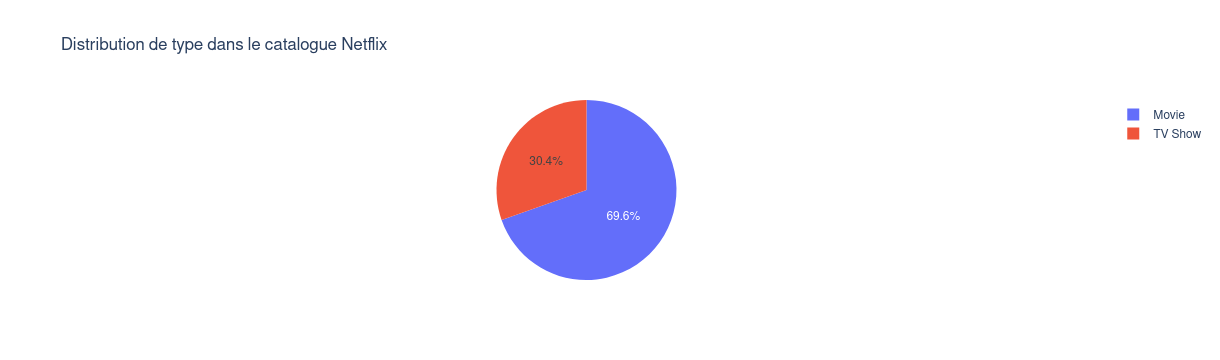

In [90]:
# Preparation de la donnees
data = df.groupby('type')['type'].count().reset_index(name='count')

fig = px.pie(
    data,
    names='type',
    values='count',
    title='Distribution de type dans le catalogue Netflix',
)
fig.show()

Avec ce graphique, il est facile de remarquer que le catalogue Netflix contient plus de film que de series.

In [107]:
data = df.pivot_table(index='type', columns='release_year', aggfunc='count')
print(data)


             cast                                               ...  title  \
release_year 1925 1942 1943 1944 1945 1946 1947 1954 1955 1956  ...   2012   
type                                                            ...          
Movie         NaN  1.0  0.0  1.0  1.0  1.0  1.0  2.0  3.0  2.0  ...  173.0   
TV Show       0.0  NaN  NaN  NaN  0.0  0.0  NaN  NaN  NaN  NaN  ...   64.0   

                                                                             
release_year   2013   2014   2015   2016   2017   2018   2019   2020   2021  
type                                                                         
Movie         225.0  264.0  398.0  658.0  767.0  767.0  633.0  517.0  277.0  
TV Show        63.0   88.0  162.0  244.0  265.0  380.0  397.0  436.0  315.0  

[2 rows x 740 columns]
